# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## Final Project

**Harvard University**<br/>
**Fall 2023**<br/>
**Team Members**: Salma Douieb, Saba Mehrzad, Benson Xie

<hr style="height:2.4pt">

In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

### Import Libraries

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split,RepeatedKFold
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings

# Table of Contents
* [1. Introduction](#1.-Introduction)
* [2. Data Dictionary](#2.-Data-Dictionary)
* [3. Data Preprocessing](#3.-Data-Preprocessing)
    * [3.1. Handling Missing Values](#3.1.-Handling-Missing-Values)
    * [3.2. Feature Engineering](#3.2.-Feature-Engineering)
* [4. Exploratory Data Analysis (EDA)](#4.-Exploratory-Data-Analysis-(EDA))
    * [4.1. Distribution of Features](#4.1.-Distribution-of-Features)
    * [4.2. Relationship Between Features and Target](#4.2.-Relationship-Between-Features-and-Target)
    * [4.3. Correlation Analysis](#4.3.-Correlation-Analysis)
* [5. Model Development](#5.-Model-Development)
    * [5.1. Model Selection](#5.1.-Model-Selection)
    * [5.2. Model Training](#5.2.-Model-Training)
    * [5.3. Model Evaluation](#5.3.-Model-Evaluation)
* [6. Further Analysis](#6.-Further-Analysis)
    * [6.1. PCA](#6.1.-PCA)
* [7. Limitations and Future Work](#7.-Limitations-and-Future-Work)
* [8. Conclusion](#8.-Conclusion)


<a id="1.-Introduction"></a>
# 1. Introduction

![Marathon Runners](./img/img1.jpg)


### Problem Statement
In the quest to improve marathon performance, runners and coaches seek to understand the multifaceted relationship between training behaviors and race outcomes. The "MarathonData" dataset from the Prague 2017 marathon offers a unique opportunity to delve into these dynamics. Through exploratory data analysis (EDA) and multilinear regression, we aim to uncover patterns and predictors that significantly influence marathon finishing times.

### Objectives

1. **Predictive Modeling**: To develop a model that can accurately predict a runner's marathon time based on training data, providing actionable insights into performance optimization.
2. **Performance Enhancement**: To identify key training factors and day-of actions that contribute to better marathon performances, enabling runners to achieve specific time goals that qualify them for elite competitions.
3. **Training Speed**: Ro predict how average training speed impacts marathon time. 


### Impact
The implications of this work extend beyond individual ambitions:

- For **runners**, understanding how different aspects of training correlate with marathon times can inform more targeted and efficient training strategies, particularly for those striving to meet the qualifying standards of prestigious marathons.
- For **marathon training programs**, insights into feature importance can guide the design of more effective training regimens, thereby enhancing the overall success rates of their athletes.

By bridging the gap between data-driven insights and training methodologies, we hope to offer a strategic tool that supports both the aspirations of marathon runners and the operational goals of training programs.

<a id="2.-Data-Dictionary"></a>
# 2. Data Dictionary

Below is a description of each variable in the "MarathonData" dataset:

- `id`: A unique identifier for each participant.
- `Marathon`: The name of the marathon event (all from "Prague17").
- `Name`: The name of the participant.
- `Category`: The category of the runner, which may include gender and age group (e.g., MAM for male, WAM for female, M45 for male aged 45-49).
- `km4week`: The average number of kilometers run per week by the participant in the last 4 weeks of training before the marathon, marathon included.
- `sp4week`: The average speed (kilometers per hour) of the participant during their training runs in the last four weeks before the marathon.
- `CrossTraining`: Any cross-training activities the participant has done, noted along with the duration if available.
    - Ex. Cyclista 3h for 3 hours of cycling
- `Wall21`: The time (in hours) it took the participant to reach the 21 km mark on race day.
- `MarathonTime`: The final time (in hours) the participant took to complete the marathon.
- `CATEGORY`: A categorical variable created by the dataset's authors to represent a classification based on performance or other criteria (e.g., A, B, C, D).


Cross training times

In [3]:
marathon_df = pd.read_csv("data/MarathonData.csv")

In [4]:
marathon_df.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A


<a id="3.-Data-Preprocessing"></a>
# 3. Data Preprocessing

### Drop Data
From the explanation about the variable in dataset, we conclude that name, CATEGORY, id, and Marathon columns are not important for analyzing and predicting the dataset. We make the assumption that one's name does not correlate to marathon speed, and "CATEGORY" is redundant as all of the runners are from category A. This column has the potential to be interesting, but only when analysed against data about how runners in other catergories perform, which we unfortunately do not have. Finally, we drop "ID" as it is a redundant column, the pandas dataframe includes an ID column by itself! Thus, we do not believe that we are losing any important informatio by dropping these columns, and will remove them to reduce the dimentionality of our data and decrease the chances of high correlation between predictors.

In [5]:
marathon_df = marathon_df.drop(['id','Marathon','CATEGORY','Name'], axis = 1)

In [6]:
marathon_df.head()

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,NaN,1.16,2.37
1,MAM,68.6,13.674419,NaN,1.23,2.59
2,MAM,82.7,13.520436,NaN,1.30,2.66
3,M45,137.5,12.258544,NaN,1.32,2.68
4,MAM,84.6,13.945055,NaN,1.36,2.74


In [7]:
marathon_df.shape

(87, 6)

### Reorganize Data

We rename the variables for better clarity. the updated dictionary becomes:
- `gender`: Gender of the runner. 1 as female, 2 as male.
- `weekly_kms`: The average number of kilometers run per week.
- `avg_training_speed`: The average speed of the participant during their training runs over four weeks.
- `cross_training`:  Any cross-training activities the participant has done, with the duration included.
- `half_marathon_ratios`: The time it took the participant to reach the 21 km mark on the race day.marathon_time1`: The final time the participant took to reacomplete the marathon.

In [8]:
column_name_mapping = {'Category': 'gender', 'km4week': 'weekly_kms', 'sp4week': 'avg_training_speed', 'CrossTraining': 'cross_training', 'Wall21': 'half_marathon_ratios', 'MarathonTime': 'marathon_time'}
marathon_df.rename(columns=column_name_mapping, inplace=True)
# Women is mapped to 1 and man is mapped to 0
gender_mapping = {'WAM': '1', 'MAM': '0', 'M40': '0', 'M45': '0', 'M50': '0', 'M55': '0'}

# Use the replace method to replace values in the 'gender' column
marathon_df['gender'] = marathon_df['gender'].replace(gender_mapping)
marathon_df.head()

,gender,weekly_kms,avg_training_speed,cross_training,half_marathon_ratios,marathon_time
0,0,132.8,14.434783,NaN,1.16,2.37
1,0,68.6,13.674419,NaN,1.23,2.59
2,0,82.7,13.520436,NaN,1.30,2.66
3,0,137.5,12.258544,NaN,1.32,2.68
4,0,84.6,13.945055,NaN,1.36,2.74


<a id="3.1.-Handling-Missing-Values"></a>
## 3.1. Handling Missing Values

We fill missing values in the 'CrossTraining' column with 'None' to represent the absence of cross-training activities.

In [9]:
marathon_df.isna().sum()

gender                   6
weekly_kms               0
avg_training_speed       0
cross_training          74
half_marathon_ratios     0
marathon_time            0
dtype: int64

In [10]:
marathon_df['cross_training'].unique()

array([nan, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 5h',
       'ciclista 3h'], dtype=object)

In [11]:
marathon_df['cross_training'].fillna('no_cross_training',inplace=True)

We found that in the "half_marathon_ratios", there are missing values, so we impute these values to the mean values.

In [12]:
marathon_df['half_marathon_ratios'] = marathon_df['half_marathon_ratios'].replace('-', np.nan)
marathon_df['half_marathon_ratios'] = pd.to_numeric(marathon_df['half_marathon_ratios'], errors='coerce')
half_marathon_ratios_mean = marathon_df['half_marathon_ratios'].mean()
marathon_df['half_marathon_ratios'].fillna(half_marathon_ratios_mean, inplace=True)

We simply impute the missing gender as the most frequent gender.

In [13]:
most_frequent_gender = marathon_df['gender'].mode()[0]
marathon_df['gender'].fillna(most_frequent_gender, inplace=True)

In [14]:
marathon_df.isna().sum()

gender                  0
weekly_kms              0
avg_training_speed      0
cross_training          0
half_marathon_ratios    0
marathon_time           0
dtype: int64

<a id="3.2.-Feature-Engineering"></a>
## 3.2. Feature Engineering

In [15]:
marathon_df.dtypes

gender                   object
weekly_kms              float64
avg_training_speed      float64
cross_training           object
half_marathon_ratios    float64
marathon_time           float64
dtype: object

In [16]:
one_hot_encoded = pd.get_dummies(marathon_df['cross_training'])
marathon_df = pd.concat([marathon_df, one_hot_encoded], axis=1)
marathon_df.drop('cross_training', axis=1, inplace=True)

In [17]:
marathon_df['ciclista 13h'] = marathon_df['ciclista 13h'].apply(lambda x: 1 if x else 0)
marathon_df['ciclista 1h'] = marathon_df['ciclista 1h'].apply(lambda x: 1 if x else 0)
marathon_df['ciclista 3h'] = marathon_df['ciclista 3h'].apply(lambda x: 1 if x else 0)
marathon_df['ciclista 4h'] = marathon_df['ciclista 4h'].apply(lambda x: 1 if x else 0)
marathon_df['ciclista 5h'] = marathon_df['ciclista 5h'].apply(lambda x: 1 if x else 0)
marathon_df.drop('no_cross_training', axis=1, inplace=True)
marathon_df.head()

,gender,weekly_kms,avg_training_speed,half_marathon_ratios,marathon_time,ciclista 13h,ciclista 1h,ciclista 3h,ciclista 4h,ciclista 5h
0,0,132.8,14.434783,1.16,2.37,0,0,0,0,0
1,0,68.6,13.674419,1.23,2.59,0,0,0,0,0
2,0,82.7,13.520436,1.30,2.66,0,0,0,0,0
3,0,137.5,12.258544,1.32,2.68,0,0,0,0,0
4,0,84.6,13.945055,1.36,2.74,0,0,0,0,0


<a id="4.-Exploratory-Data-Analysis-(EDA)"></a>
# 4. Exploratory Data Analysis (EDA)

<a id="4.1.-Distribution-of-Features"></a>
## 4.1. Distribution of Features

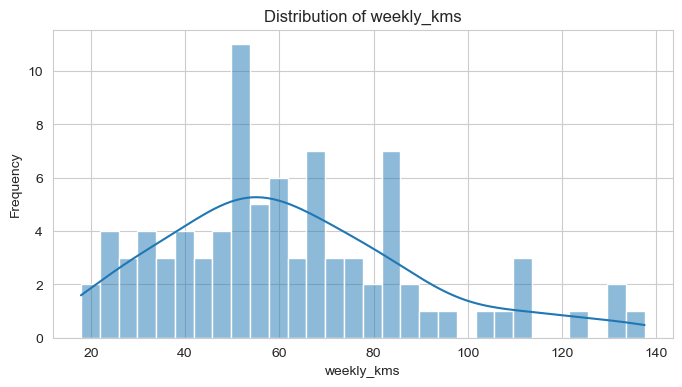

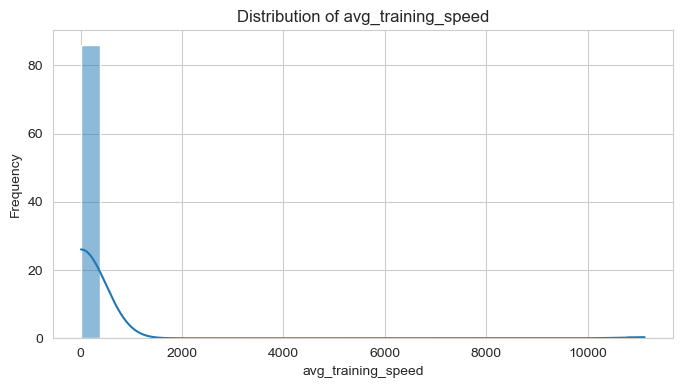

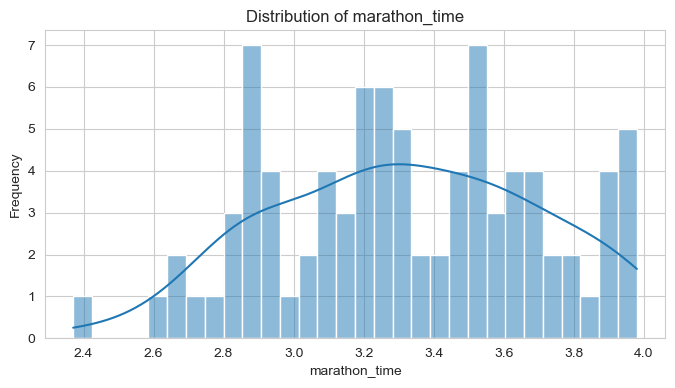

In [18]:
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

continuous_features = ['weekly_kms', 'avg_training_speed', 'marathon_time']

for feature in continuous_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(marathon_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

**Distribution of weekly_kms**:
- The distribution of weekly kilometers run by participants appears to be right-skewed, indicating that most runners train on the lower end of the kilometers spectrum, with a few running significantly more.
- There are peaks around certain values, which may suggest common training plans or natural groupings of training habits among runners.

**Distribution of avg_training_speed**:
- This histogram shows a large peak at the lower end of the speed spectrum, with a long tail extending to the right. However, the tail seems to consist of extreme outliers, particularly a value near 10,000 that is likely incorrect or a data entry error.
- The scale of the x-axis suggests that there may be a need to clean this feature further to remove or correct the outlier(s)

**Distribution of marathon_time:**
- Marathon times appear to be somewhat normally distributed around a central peak, suggesting that most marathon finish times cluster around a common value.
- There is a slight right skew, indicating that while most runners finish within a typical time range, there are a few runners who take much longer to finish.

Text(0, 0.5, 'Frequency')

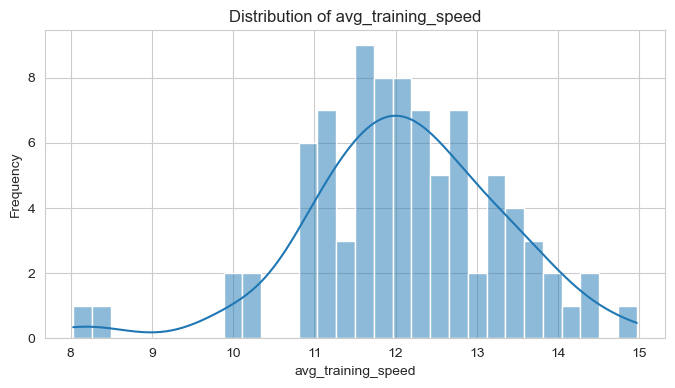

In [19]:
marathon_df = marathon_df.query('avg_training_speed<200')
plt.figure(figsize=(8, 4))
sns.histplot(marathon_df['avg_training_speed'], kde=True, bins=30)
plt.title(f'Distribution of avg_training_speed')
plt.xlabel('avg_training_speed')
plt.ylabel('Frequency')

We removed the outlier and get this new distribution plot for **avg_training_speed**:
- The corrected histogram shows a relatively normal distribution of average training speeds among the participants, with most values falling within a reasonable range of speeds for distance runners.
- There is a slight right skew, indicating that a few runners have an average training speed that is higher than the rest of the group, but there are no extreme values like those previously seen.

Text(0, 0.5, 'Cross Training Type')

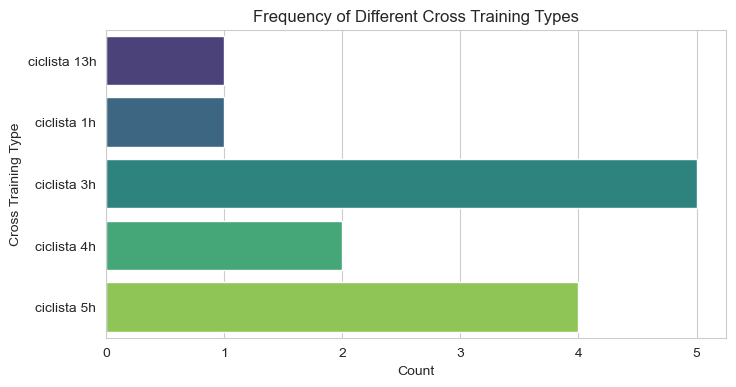

In [20]:
cross_training_counts = marathon_df.filter(like='ciclista').sum().reset_index()
cross_training_counts.columns = ['cross_training_type', 'count']

# Now let's create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='count', y='cross_training_type', data=cross_training_counts, palette='viridis')
plt.title('Frequency of Different Cross Training Types')
plt.xlabel('Count')
plt.ylabel('Cross Training Type')


Most of the runners prefer a moderate amount of cross-training could inform the development of balanced training plans that allocate a reasonable time to cross-training without overburdening the runners. However, most of the runners did not do cross training in this dataset.

<a id="4.2.-Relationship-Between-Features-and-Target"></a>
## 4.2. Relationship Between Features and Target

In [21]:
numerical_sub_df = marathon_df.drop(columns=["ciclista 13h", "ciclista 1h", "ciclista 3h", "ciclista 4h", "ciclista 5h", "gender"])

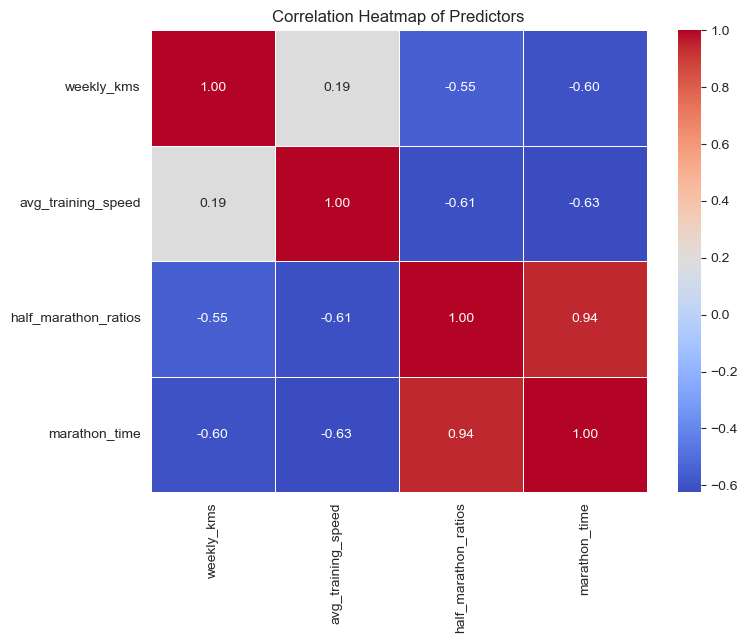

In [22]:
corr_matrix = numerical_sub_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Predictors')
plt.show()

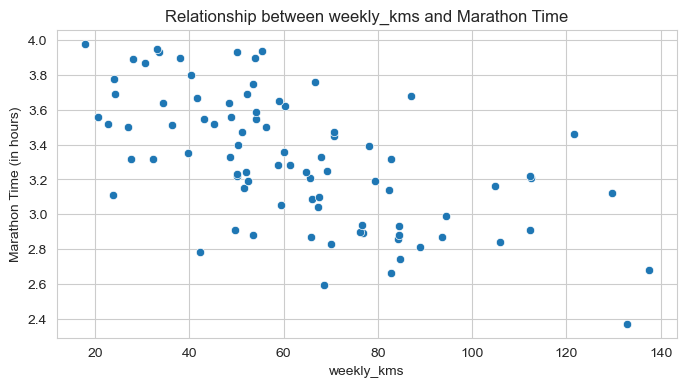

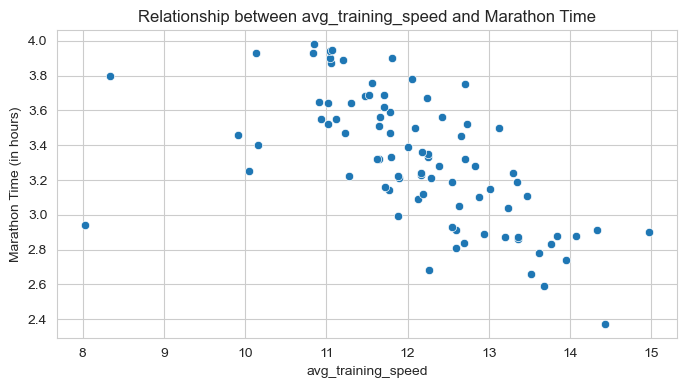

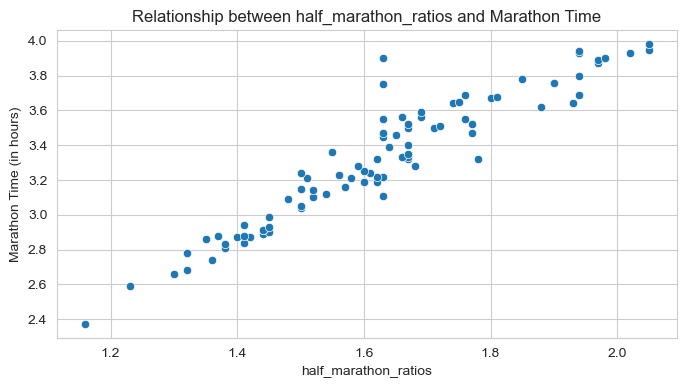

In [23]:
numerical_features = ['weekly_kms', 'avg_training_speed', 'half_marathon_ratios']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=marathon_df, x=feature, y='marathon_time')
    plt.title(f'Relationship between {feature} and Marathon Time')
    plt.xlabel(feature)
    plt.ylabel('Marathon Time (in hours)')


<a id="4.3.-Correlation-Analysis"></a>
## 4.3. Correlation Analysis

In [24]:
# Calculate correlation coefficients
correlation = marathon_df[numerical_features + ['marathon_time']].corr()

# Display the correlation with marathon time
print(correlation['marathon_time'].sort_values(ascending=False))


marathon_time           1.000000
half_marathon_ratios    0.942903
weekly_kms             -0.600657
avg_training_speed     -0.625100
Name: marathon_time, dtype: float64


**Weekly Kilometers (weekly_kms) vs. Marathon Time**:
- The scatter plot shows a moderate negative correlation between weekly_kms and marathon time, as indicated by the correlation coefficient of -0.680657. This suggests that runners who train more kilometers per week tend to have faster marathon times, which aligns with conventional training wisdom.

**Average Training Speed (avg_training_speed) vs. Marathon Time**:
- A negative correlation is also observed between avg_training_speed and marathon time, with a correlation coefficient of -0.625100. This implies that runners with higher average training speeds tend to achieve better (lower) marathon times. The scatter plot supports this with a trend indicating that faster training speeds are associated with faster marathon completion.

**Half Marathon Ratios (half_marathon_ratios) vs. Marathon Time**:
- There is a strong positive correlation between the half_marathon_ratios and marathon time, with a correlation coefficient of 0.942903. The scatter plot illustrates this with a clear upward trend, indicating that runners who have a higher ratio (meaning their half marathon time is a larger fraction of their full marathon time) are likely to have slower overall marathon times. This could reflect a number of factors including pacing strategy, endurance, or overall running efficiency

<a id="5.-Model-Development"></a>
# 5. Model Development

<a id="5.1.-Model-Selection"></a>
## 5.1. Model Selection

**Baseline Model**:
We started with a simple linear regression model to establish a baseline because it is simple and not prone to overfitting. Some assumptions in the linear regression model include the fact that the relationship is linear in the first place, the independence of the residuals, and homoscedasticity. 

In [25]:
X = marathon_df.drop(['marathon_time'], axis=1)  
y = marathon_df['marathon_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred_train = linear_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_pred_train)

print(f"Mean Squared Error (MSE) on the train set: {train_mse:.2f}")

y_pred = linear_model.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) on the test set: {test_mse:.2f}")

cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores
print(f"Mean CV MSE: {cv_mse.mean():.2f}")


Mean Squared Error (MSE) on the train set: 0.01
Mean Squared Error (MSE) on the test set: 0.02
Mean CV MSE: 0.02


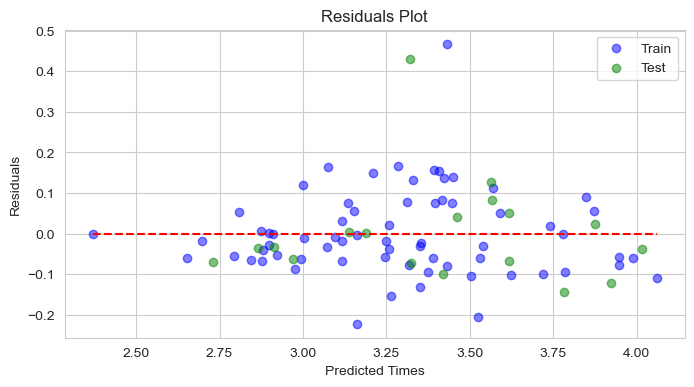

In [26]:
# Residuals Plot for Training and Test Sets
plt.figure(figsize=(8, 4))
plt.scatter(y_pred_train, y_train - y_pred_train, label='Train', color='blue', alpha=0.5)
plt.scatter(y_pred, y_test - y_pred, label='Test', color='green', alpha=0.5)
plt.hlines(y=0, xmin=min(y_pred_train), xmax=max(y_pred_train), color='red', linestyles='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Times')
plt.ylabel('Residuals')
plt.legend()

Due to the even distribution of the residuals, aside from a few outliers, we can conclude that the data is homoscedastic. 

[-4.13242179e-02 -2.21038947e-03 -4.67073836e-02  1.47417526e+00
 -4.54735499e-03 -5.55111512e-17 -6.74152006e-02  4.02348364e-02
 -8.69508598e-02]


Text(0, 0.5, 'Coefficient Value')

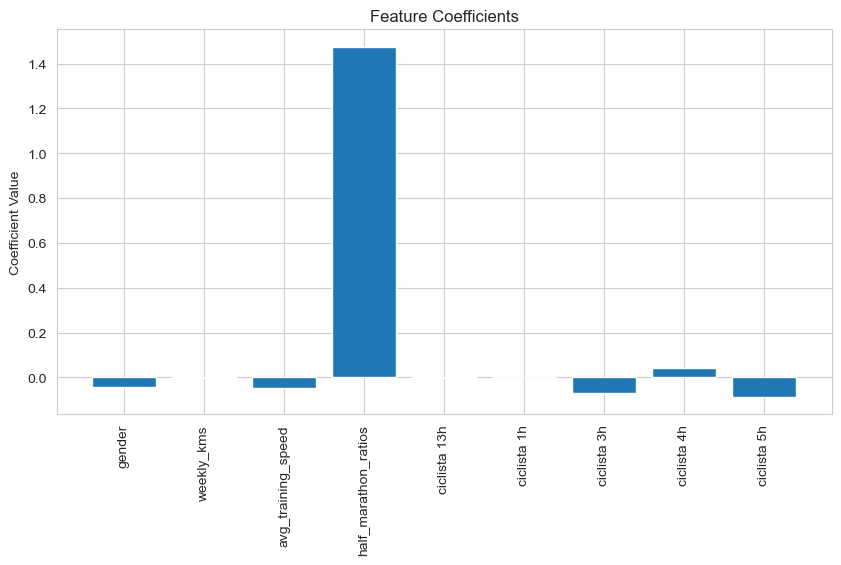

In [27]:
feature_names = X_train.columns
coefficients = linear_model.coef_
print(coefficients)
# Visualizing Coefficients
plt.figure(figsize=(10, 5))
plt.bar(feature_names, coefficients)
plt.title('Feature Coefficients')
plt.xticks(rotation=90)
plt.ylabel('Coefficient Value')


After ploting out the coefficients, we found that **'half_marathon_ratios'** is the most significant predictor for marathon time. 
To choose the right model, we trained models with **Random Forest** and **Gradient Boosting** just to compare.

We chose Random Forest as one of our complex models due to its high predictive accuracy, robustness to overfitting (essential due to the size of our dataset), and the fact that it gives insights into feature performance. Random Forest assumes that there are no formal distributions. 

Next, we used Gradient boosting because, like Random Forest, it displays high predictive accuracy and feature importance. However, since it is an ensemble learning model, it may provide better generalization.

In [28]:
rf_model = RandomForestRegressor(n_estimators=100)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf, squared=True)
rmse_rf = np.sqrt(mse_rf)
print(f"Random Forest RMSE on the test set: {rmse_rf:.2f}")

cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_rf =-cv_scores_rf
cv_rmse_rf = np.sqrt(cv_mse_rf)
print(f"Random Forest Mean CV RMSE: {cv_mse_rf.mean():.2f}, CV RMSE Standard Deviation: {cv_rmse_rf.std():.2f}")


Random Forest RMSE on the test set: 0.14
Random Forest Mean CV RMSE: 0.05, CV RMSE Standard Deviation: 0.06


In [29]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
print(f"Gradient Boosting MSE on the test set: {rmse_gb:.2f}")

cv_scores_gb = cross_val_score(gb_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_gb = -cv_scores_gb
cv_rmse_gb = np.sqrt(cv_mse_gb)
print(f"Gradient Boosting Mean CV RMSE: {cv_rmse_gb.mean():.2f}, CV RMSE Standard Deviation: {cv_rmse_gb.std():.2f}")


Gradient Boosting MSE on the test set: 0.14
Gradient Boosting Mean CV RMSE: 0.20, CV RMSE Standard Deviation: 0.05


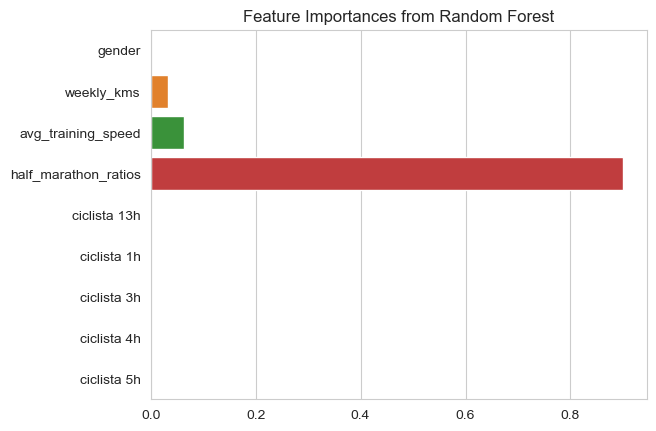

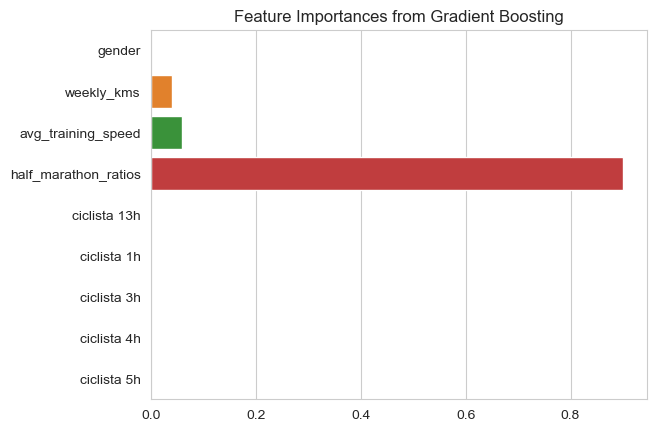

In [30]:
feature_importances_rf = rf_model.feature_importances_
sns.barplot(x=feature_importances_rf, y=X_train.columns)
plt.title('Feature Importances from Random Forest')
plt.show()

feature_importances_gb = gb_model.feature_importances_
sns.barplot(x=feature_importances_gb, y=X_train.columns)
plt.title('Feature Importances from Gradient Boosting')
plt.show()


Next, we compared the MSE and Cross Validation MSE values to determine which model is the best going forward.

Text(0.5, 1.0, 'Comparison of MSEs')

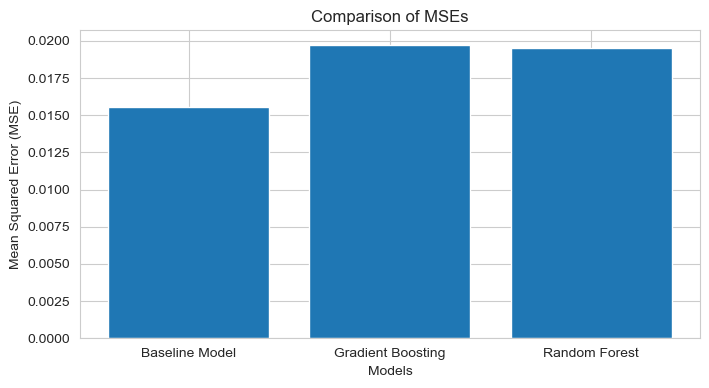

In [31]:
mse_values = [test_mse, mse_gb, mse_rf]
models = ['Baseline Model', 'Gradient Boosting', 'Random Forest']

plt.figure(figsize=(8, 4))
plt.bar(models, mse_values)

plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSEs')

Text(0.5, 1.0, 'Comparison of Cross Validation MSEs')

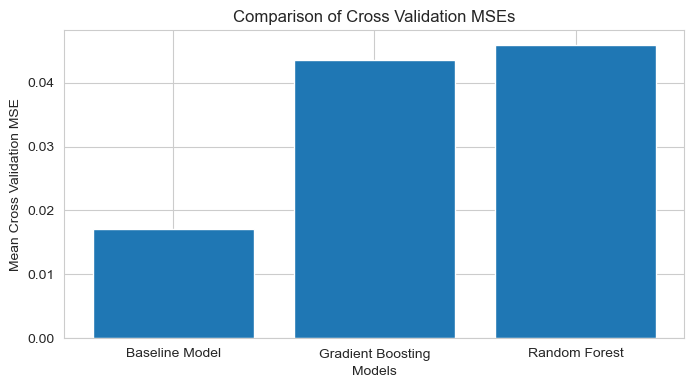

In [32]:
cv_mse_values = [cv_mse.mean(), cv_mse_gb.mean(), cv_mse_rf.mean()]
models = ['Baseline Model', 'Gradient Boosting', 'Random Forest']

plt.figure(figsize=(8, 4))
plt.bar(models, cv_mse_values)

plt.xlabel('Models')
plt.ylabel('Mean Cross Validation MSE')
plt.title('Comparison of Cross Validation MSEs')

After trying different regression models for prediction marathon time. We found that the performances are similar to each other. When analyzing the test MSEs, we found that Gradient Boosting gave the smallest MSE values. However, when comparing the cross-validation MSE values, we determined that the baseline model had the smallest MSE value. Therefore, we decided to go forward with the linear regression model because the cross-validation because it is more representative with the whole data. Additionally, due to the fact that we have a small sample size, the MSE for a train test split are less likely to reflect the trends in the data. Therefore, we chose to use linear regression as our model to further analyze our data.

Moreover, due to the fact that our sample size is small, a simpler model could better prevent overfitting and better fit a less complex dataset. And, a linear regression is easier to interpret.

<a id="5.2.-Model-Training"></a>
## 5.2. Model Training

We suspect that **half_marathon_ratios** is dominating the model to the extent that it's overshadowing the effects of other variables, it can be insightful to remove it and retrain the model. This can help us understand the relative importance and effects of the other features like cross-training, weekly kilometers and average training speed. By doing this we are focusing on analyzing what type of training may benefit runners to better performances.

In [33]:
X_reduced = marathon_df.drop(['marathon_time', 'half_marathon_ratios', 'gender'], axis=1)

X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=30)

In [55]:
linear_model2 = LinearRegression()

linear_model2.fit(X_train_reduced, y_train)

y_pred_train = linear_model2.predict(X_train_reduced)
train_mse = mean_squared_error(y_train, y_pred_train)

print(f"Mean Squared Error (MSE) on the train set: {train_mse:.2f}")

y_pred = linear_model2.predict(X_test_reduced)

mse = mean_squared_error(y_test, y_pred)
cv_score_lr2 = cross_val_score(linear_model2, X_reduced, y, cv=5, scoring='neg_mean_squared_error').mean()
cv_mse_lr2 = -cv_scores

print(f"Mean Squared Error (MSE) on the test set: {mse:.2f}")



Mean Squared Error (MSE) on the train set: 0.05
Mean Squared Error (MSE) on the test set: 0.04


<a id="5.3.-Model-Evaluation"></a>
## 5.3. Model Evaluation

Even though the model trained has less predictive power than the baseline model, we found that:
- Training with higher average speed leads to faster marathon time. This makes sense because the faster you run during training, the faster you will run during the actual marathon.
- Runners does not need to run a lot kilometers to perform better
- In fact, too much cross training(13h) can leads to worse performances. However, there is a lack of causal inference here. Could it be because they are too exhausted from cross training, or perhaps too much cross training leads to too much muscle gain, which may make the runner heavier and reduce their endurance over the marathon distance.

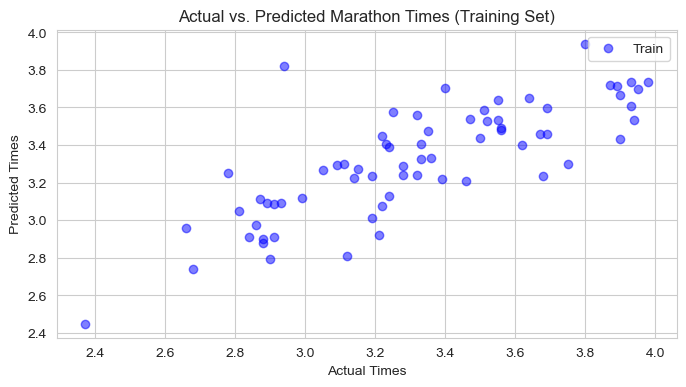

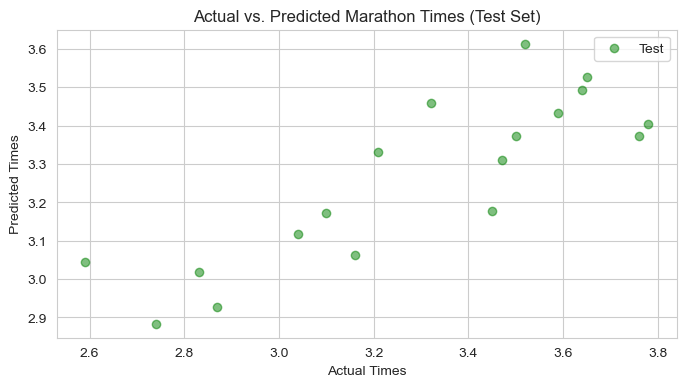

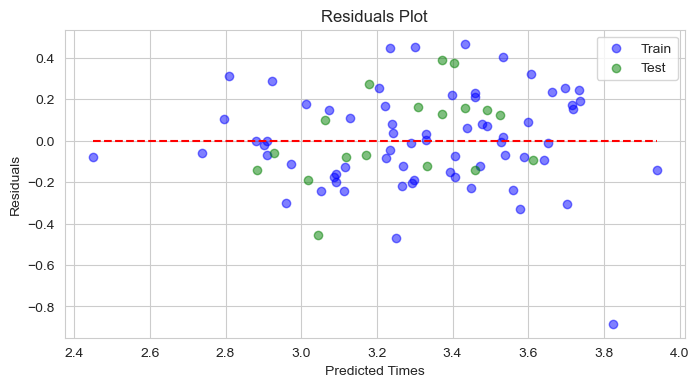

In [35]:
# Visualizing Actual vs. Predicted Values for Training Set
plt.figure(figsize=(8, 4))
plt.scatter(y_train, y_pred_train, label='Train', color='blue', alpha=0.5)
plt.title('Actual vs. Predicted Marathon Times (Training Set)')
plt.xlabel('Actual Times')
plt.ylabel('Predicted Times')
plt.legend()
plt.show()

# Visualizing Actual vs. Predicted Values for Test Set
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, label='Test', color='green', alpha=0.5)
plt.title('Actual vs. Predicted Marathon Times (Test Set)')
plt.xlabel('Actual Times')
plt.ylabel('Predicted Times')
plt.legend()
plt.show()

# Residuals Plot for Training and Test Sets
plt.figure(figsize=(8, 4))
plt.scatter(y_pred_train, y_train - y_pred_train, label='Train', color='blue', alpha=0.5)
plt.scatter(y_pred, y_test - y_pred, label='Test', color='green', alpha=0.5)
plt.hlines(y=0, xmin=min(y_pred_train), xmax=max(y_pred_train), color='red', linestyles='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Times')
plt.ylabel('Residuals')
plt.legend()



[-7.49301227e-03 -1.48869253e-01  3.28948731e-02  1.38777878e-17
 -9.69348275e-02 -2.16689676e-01 -1.10918833e-01]


Text(0, 0.5, 'Coefficient Value')

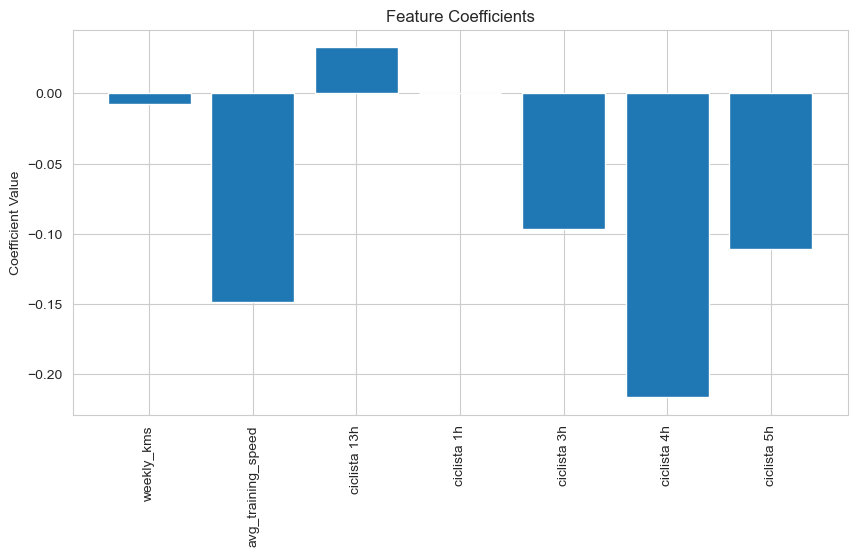

In [36]:
feature_names = X_train_reduced.columns
coefficients = linear_model2.coef_
print(coefficients)
# Visualizing Coefficients
plt.figure(figsize=(10, 5))
plt.bar(feature_names, coefficients)
plt.title('Feature Coefficients')
plt.xticks(rotation=90)
plt.ylabel('Coefficient Value')


Text(0.5, 1.0, 'Comparison of Cross Validation MSEs')

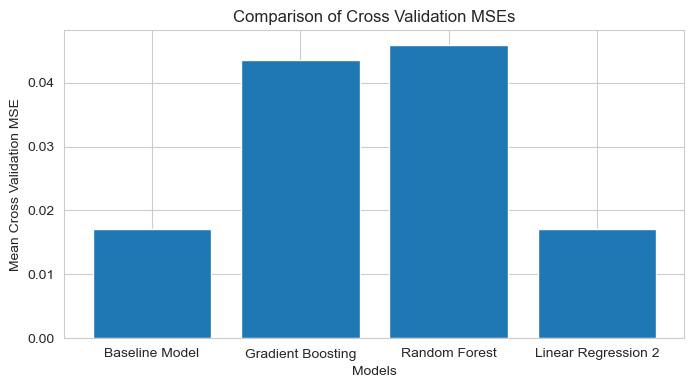

In [56]:
cv_mse_values = [cv_mse.mean(), cv_mse_gb.mean(), cv_mse_rf.mean(), cv_mse_lr2.mean()]
models = ['Baseline Model', 'Gradient Boosting', 'Random Forest', 'Linear Regression 2']

plt.figure(figsize=(8, 4))
plt.bar(models, cv_mse_values)

plt.xlabel('Models')
plt.ylabel('Mean Cross Validation MSE')
plt.title('Comparison of Cross Validation MSEs')

We see that our second linear regression performs very smiliarly to our baseline model, indicating that removing the half-marathon ratio  metric does not change the performance our model.

<a id="6.-Further-Analysis"></a>
# 6. Further Analysis

<a id="6.1.-PCA"></a>
## 6.1. PCA
Due to the dominance of half marathon time as a predictor in the first part, we decided to conduct Principal Component Analysis to get a better sense of how each predictor explains the variance in marathon times. This allows us to reduce the dimentionality of the data onto a 2D plot, such that it is easier to visualise how the different marathon times seperate out. Additionally, it gives us a more robust way of determining feature importance, which is the main goal of our project (determining which training feature is most important for marathon performance).

In [38]:
y = marathon_df['marathon_time']

In [39]:
X_reduced.head()

,weekly_kms,avg_training_speed,ciclista 13h,ciclista 1h,ciclista 3h,ciclista 4h,ciclista 5h
0,132.8,14.434783,0,0,0,0,0
1,68.6,13.674419,0,0,0,0,0
2,82.7,13.520436,0,0,0,0,0
3,137.5,12.258544,0,0,0,0,0
4,84.6,13.945055,0,0,0,0,0


In [40]:
# Scaling the data
X_std = StandardScaler().fit_transform(X_reduced)

In [41]:
pca = PCA().fit(X_std)

In [42]:
X_pca = pca.transform(X_std)

In [43]:
X_pca.shape

(86, 7)

In [44]:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

In [45]:
list(zip(X_reduced.columns, pca.components_[0]))

[('weekly_kms', 0.6139296117267369),
 ('avg_training_speed', 0.4633426196325945),
 ('ciclista 13h', 0.27473007685252987),
 ('ciclista 1h', 0.17809103536963167),
 ('ciclista 3h', -0.3463659799711458),
 ('ciclista 4h', -0.012213722166689922),
 ('ciclista 5h', -0.4255495853365414)]

In [46]:
list(zip(X_reduced.columns, pca.components_[1]))

[('weekly_kms', -0.3119511046841285),
 ('avg_training_speed', 0.45312168866410535),
 ('ciclista 13h', -0.34940653825788703),
 ('ciclista 1h', 0.34786607010637427),
 ('ciclista 3h', -0.158191690156584),
 ('ciclista 4h', 0.6510450429787947),
 ('ciclista 5h', 0.07339790881265543)]

We can see how each predictor maps onto the principle components. Since the first 2 principle components explain the most variance, I will plot only these two components. It would also be useful to visualise how the marathon times seperate out when the principle components are plotted. To do this, we have decided to discretise the data by replacing the continuous marathon times with buckets corresponding to that marathon time falling wihtin a certain range.

In [47]:
display(y)

0     2.37
1     2.59
2     2.66
3     2.68
4     2.74
      ... 
82    3.93
83    3.93
84    3.94
85    3.95
86    3.98
Name: marathon_time, Length: 86, dtype: float64

In [48]:
min_value = y.min()
max_value = y.max()
print(min_value)
print(max_value)

2.37
3.98


We have marathon times ranging from 2.37 hours to 3.98 hours. Thus, we will make the buckets 30 minutes long, starting at 2 hours and going to 4 hours. So we replace the values as follows:

- `marathon_time` between 2 and 2.5 hours: 1
- `marathon_time`between 2.5 and 3 hours: 2
- `marathon_time` between 3 and 3.5 hours: 3
- `marathon_time` between 3.5 and 4 hours: 4

In [49]:
def replace_values(value):
    if 2 <= value < 2.5:
        return 1
    elif 2.5 <= value < 3:
        return 2
    elif 3 <= value <= 3.5:
        return 3
    elif 3.5 <= value <= 4:
        return 4
    else:
        return value

In [50]:
binned_y = y.apply(replace_values)

In [51]:
times_df = binned_y.to_frame()

In [52]:
times_df = times_df.drop(86, axis=0)

In [53]:
display(times_df)

,marathon_time
0,1
1,2
2,2
3,2
4,2
...,...
80,4
82,4
83,4
84,4


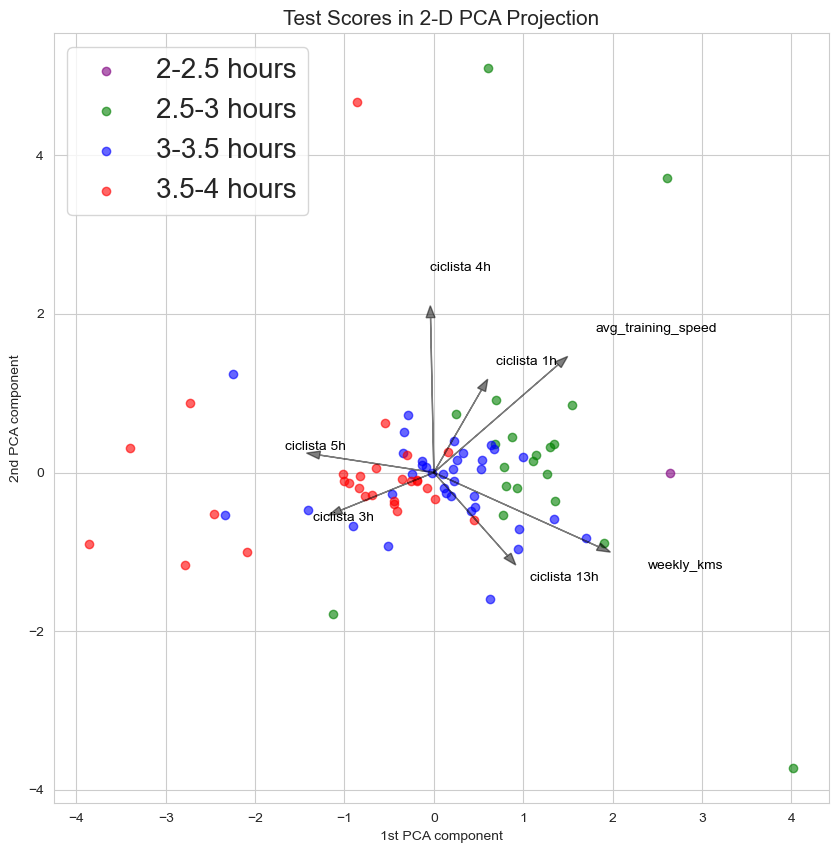

In [54]:
plt.figure(figsize=(10, 10))

# Define a color palette for each value in the range
palette = sns.color_palette('viridis', n_colors=4)

subset1 = times_df[times_df['marathon_time'] == 1]
plt.scatter(pca_df.loc[subset1.index, 'PC1'], pca_df.loc[subset1.index, 'PC2'], alpha=0.6, label=f"2-2.5 hours", color='purple')
subset2 = times_df[times_df['marathon_time'] == 2]
plt.scatter(pca_df.loc[subset2.index, 'PC1'], pca_df.loc[subset2.index, 'PC2'], alpha=0.6, label=f"2.5-3 hours", color='green')
subset3 = times_df[times_df['marathon_time'] == 3]
plt.scatter(pca_df.loc[subset3.index, 'PC1'], pca_df.loc[subset3.index, 'PC2'], alpha=0.6, label=f"3-3.5 hours", color='blue')
subset4 = times_df[times_df['marathon_time'] == 4]
plt.scatter(pca_df.loc[subset4.index, 'PC1'], pca_df.loc[subset4.index, 'PC2'], alpha=0.6, label=f"3.5-4 hours", color='red')

# scale up contributions by 3x for improved visibility
for i, vec in enumerate(pca.components_.T*3):
    plt.arrow(0, 0, vec[0], vec[1], color='k', head_width=0.1, alpha=0.5)
    offset = 1.3
    plt.annotate(X_reduced.columns[i],
                 (offset*vec[0], offset*vec[1]), color='k', fontsize=10)


plt.legend(fontsize=20)
plt.xlabel('1st PCA component', fontsize=10)
plt.ylabel('2nd PCA component', fontsize=10)
plt.title("Test Scores in 2-D PCA Projection", fontsize=15)
plt.show()

### Interpretation
- Notice first the fastest time, the purple point on the far right. It is clearly heavily influenced by `weekly_kms` and `avg_training_speed` as those are the two arrows on either side. This also suggests that to run a very fast marathon, your average training speed and weekly kilometers have to be extremely high, which makes sense. The positioning of the point also suggests that these two factors are evenly contributing to improved marathon performancfe, as the point lies relatively evenly between them.
- The PCA demonstrates that both quantity and speed of training miles leads to faster marathon outcomes in general, as we see the points go from faster to slower as we move from right to left on the plot.    
- Interestingly, for the blue category (3-3.5 hours), there seems to be a lot of variation of where the points lie on the plot. Some seem to have training habits that mirror the slowest category, and some seem to have training habits that mirror the second fastest category. I believe, as a runner, that this can be explained by the time range itself. A 3-3.5 hour marathon for men is a good marathon for a recreational male runner, but would be considered excellent for a woman. In fact, the 2022 Boston qualifying time for women between the ages of 18 and 34 was 3.5 hours, but for men of the same age range it was 3 hours. This may suggest more analysis needs to be done to determine what has a greater impace on performance for this middle category, and how other factors like gender may play a role. Additionally, more data on cross fit training would have been more indightful to our PCA, as it is difficult to tell with the limited data to what extent cross fit training is beneficial to performance (especially considering the PCA yielded somewhat contradictory results).

<a id="7.-Limitations-and-Future-Work"></a>
# 7. Limitations and Future Work

### Data size
The main problem with our data set was that it was quite small. Containing only 86 rows, many of which had blank values of which we had to implement imputation techniques (see section 3.1 for details). This means that the conclusions we have drawn from our feature analysis may not generalise well to new data. Additionally, we had a sparsity issue particularily with the cross fit data, as most rows had no data about the athletes cross training habits. This means that we were unable to properly analyse the impact of cross training, leading to some contradictory results as seen in the Principle Component Analysis.

### Class Imbalances
For the Category (Gender and Age) and Cross Training variables, there were obvious issues with class imbalance, such that there was more information about certain classes than others. For instance, in the category variable, we had more information about male runners than female runners. If we decided to analyze gender differences, this would lead to results that could not be generalizable. Additionally, our data is best generalized on male runners and we face the risk of not being able to apply these results to female runners. Class imbalances may lead to biased model performance and misleading feature importance

### Lack of causal inference
Another issue with our data is not due to its lack of rows, but instead its lack of predictors. We were unable to draw insightful causal inferences from the data, simply reporting on how predictors correlated with marathon times. For example, correlation analysis suggested that more cross training led to slower marathon times; however, we do not have enough data to understand why. Could it be due to exhaustion or muscular weight gain weighing the athlete down.

<a id="8.-Conclusion"></a>
# 8. Conclusion - The Finish Line

Ultimately, the limitations of our data did not prevent us from illuminating the most important aspects of a successful marathon training and race day stategy. The key conclusions drawn from our analysis are as follows:

**Pacing strategy**:
Through correlation analysis, we were able to discover a very high correlation between final marathon time and the ratio between the second half and the first half of the marathon. A high half marathon ratio means the second half of the marathon was slower than the first. This is a highly non-trivial result. Many novice runners make the mistake of underestimating the length of a marathon, and have a tendency to go too fast out of the gate. Like they say, it's a marathon, not a sprint! The extremely high correlation here shows that no matter how one trains, the most important thing they can do on race day is ensure a steady pace is maintained throughout the race, accross both half marathons.

**Training Strategy**:
As expected, both our multilinear regression model and in the Principle Component Analysis, training speed came out on top as the most important predictor for marathon time. Not only does this make intuitive sense, as a faster runner in training is likely to be a faster runner in general, but it is also consistent with running literature, which argues that marathon runners should polarise their training, running very fast at times, and very slow at others. These very fast training sessions should approach a sprint and will skew the average training speed for the week to be higher. Hence, we may argue that the faster marathon runners were implementing this training technique. As mentioned, more data would need to be collected to draw a conclusion about specific training patterns, but based on our analysis, if you run fast in general, you are likely to run fast in the race! 